<a href="https://colab.research.google.com/github/diogenesjusto/FIAP-On-Line-Graduation/blob/main/code/1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

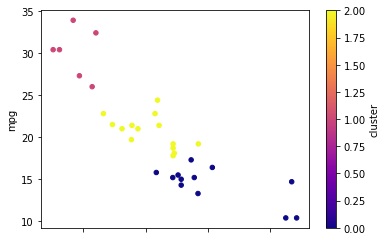

In [1]:
# carrega as bibliotecas pandas e Kmeans
import pandas as pd
from sklearn.cluster import KMeans

# carrega o dataset 
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

# executa o algoritmo K-Means com 3 clusters, utilizando as variáveis mpg (milhas por galão) e wt (peso)
k = KMeans(n_clusters=3, random_state=0).fit(df[['mpg','wt']])

# adiciona o número do cluster (entre 0, 1 e 2) como uma nova coluna no dataframe
df['cluster'] = k.labels_

# visualização gráfico de dispersão das duas variáveis escolhidas, identificando no gráfico cada objeto o cluster ao qual pertence
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

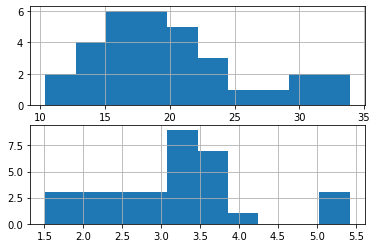

In [2]:
import matplotlib.pyplot as plt
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
 
# Padronização de variáveis
df['mpg'].hist(ax=axes[0])
df['wt'].hist(ax=axes[1])


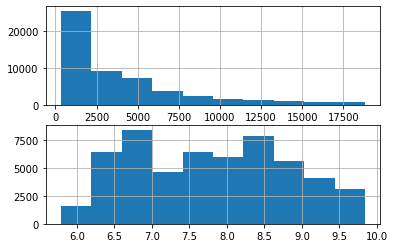

In [3]:
# Método de ajuste de escala Log-Lin

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
 
# carrega dados
dfd = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/diamonds.csv")
# constrói histograma de price
dfd['price'].hist(ax=axes[0])
 
# aplica uma transformação logarítmica na variável price
dfd['price_log'] = np.log(dfd['price'])
dfd['price_log'].hist(ax=axes[1])

In [ ]:
# Métodos estatísticos de ajuste de escala